# MNIST

Obiettivo: costruire un modello che sia in grado di riconoscere carattere numerico manoscritto.

paragonare modello dl senza preprocessing e modello costruito dopo preprocessing

## Step

Al fine di diminuire il numero di neuroni della rete e migliorare le prestazioni, si effettua del preprocessing.

- Importing data
- Preprocessing
  1. eliminazione rumore (filtro mediano)
  1. uniforming thickness
  1. resizing & centering
  1. fixing discontinuity (reconstructing ink hole)
  1. normalizing
- model

Cominciamo importando le librerie necessarie per il corretto funzionamento del codice (tensorflow, keras, matplotlib)

In [2]:
%%capture
import os
import cv2
import tensorflow.keras as keras
import tensorflow as tf
import mnist
import numpy as np
import matplotlib.pyplot as plt
from   tensorflow.keras.models import Sequential
from   tensorflow.keras.layers import Dense

2023-03-26 01:25:36.962803: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## No pre-processing
Addestro modello senza effettuare preprocessing

In [38]:
# loading data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path = "mnist.npz")

# undestand data dimensions
print("Data dimensions:\n")
print("x_lrn:",x_train.shape)
print("x_tst:",x_test.shape)
print("y_lrn:",y_train.shape)
print("y_tst:",y_test.shape)

Data dimensions:

x_lrn: (60000, 28, 28)
x_tst: (10000, 28, 28)
y_lrn: (60000,)
y_tst: (10000,)


Ecco il pattern n. 7
Il valore atteso è:  3


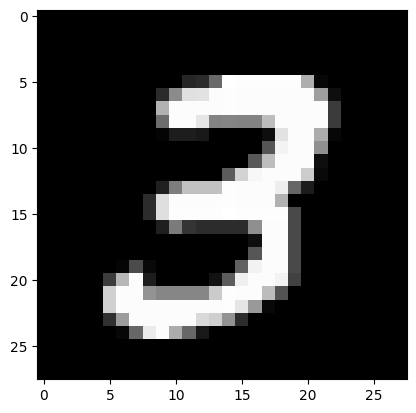

In [39]:
npat = 7
print("Ecco il pattern n.", npat)
print("Il valore atteso è: ", y_train[npat]);

img = x_train[npat];
plt.imshow(img, cmap = 'gray')
plt.show(block = False)

In [40]:
# flattening
# si può fare anche con neural networks

if x_train.shape[1] == x_train.shape[2] and x_test.shape[1] == x_test.shape[2] and x_train.shape[1] == x_test.shape[1]:
    long_dimension = x_train.shape[1]*x_train.shape[1]
else:
    print("ERROR")


x_train = x_train.reshape(x_train.shape[0],long_dimension)
x_test = x_test.reshape(x_test.shape[0],long_dimension)

print("New dimensions\n")
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)

New dimensions

x_train: (60000, 784)
x_test: (10000, 784)


In [ ]:
# rendo categoriche le variabili di output
num_categories = 10
y_train = keras.utils.to_categorical(y_train,num_categories)
y_test = keras.utils.to_categorical(y_test, num_categories)

# visualizzo preview del pattern categorizzato
print("New categorical output pattern n.",npat,"=",y_train[npat])

In [ ]:
# casting
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# normalizzo
print("Before normalization")

x_max = np.amax(x_train, axis = 1, keepdims=True)
print("I valori univoci dell'array dei massimi (train) sono:",np.unique(x_max))
x_train /= x_max

x_max = np.amax(x_test, axis = 1, keepdims=True)
print("I valori univoci dell'array dei massimi (test) sono:",np.unique(x_max))
x_test /= x_max

In [ ]:
# creo il modello
model = Sequential()

# aggiungo layer + input
model.add(Dense(units = 100, activation = 'relu', input_shape = (784,)))

# aggiungo uno strato nascosto
model.add(Dense(units = 2, activation = 'relu'))

# output layer
model.add(Dense(units = 10, activation = 'softmax'))
model.summary()

In [ ]:
# addestro il modello
model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 15, verbose = 1, validation_data = (x_test, y_test));

In [ ]:
print("Ecco il risultato del training senza preprocessing")

In [ ]:
# List all data in history
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Salvataggio del modello
model.save('4_mnist/models/np.mnist.model.h5')
plt.show()

## Importo le mie immagini

Creo funzione per salvare tutte le immagini di una cartella in un array e ridimensionarle.

In [47]:
# definisci funzione 'importa_mie_immagini'
def importa_mie_immagini(cartella_immagini, nuova_dimensione):
    # inizializza l'array numpy per contenere tutte le immagini ridimensionate
    immagini = np.empty((0, *nuova_dimensione), dtype=np.uint8)

    # scorri tutti i file nella cartella specificata
    for nome_file in os.listdir(cartella_immagini):
        # carica l'immagine
        percorso_file = os.path.join(cartella_immagini, nome_file)
        img = cv2.imread(percorso_file, cv2.IMREAD_GRAYSCALE)

        # ridimensiona l'immagine
        img_ridimensionata = cv2.resize(img, nuova_dimensione)

        # aggiungi l'immagine all'array numpy
        immagini = np.vstack([immagini, np.expand_dims(img_ridimensionata, axis=0)])

    return immagini

# specifica il percorso della cartella contenente le immagini
cartella_immagini = "4_mnist/img/numbers"

# specifica le dimensioni desiderate
nuova_dimensione = (28, 28)

# carica le immagini
immagini = importa_mie_immagini(cartella_immagini, nuova_dimensione)

# stampa le dimensioni dell'array numpy contenente tutte le immagini ridimensionate
print(immagini.shape)

(10, 28, 28)


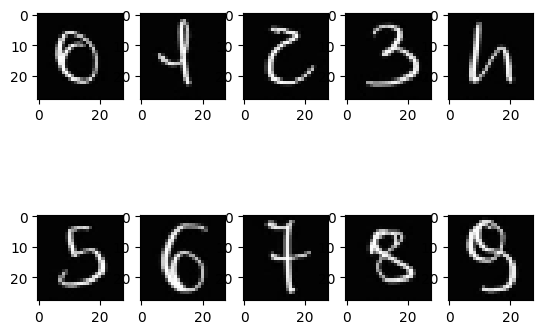

In [42]:
# mostra le mie immagini
for i in range(0, immagini.shape[0]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(immagini[i], cmap = 'gray')
plt.show(block = False)

1/1 [==============================] - 0s 22ms/step


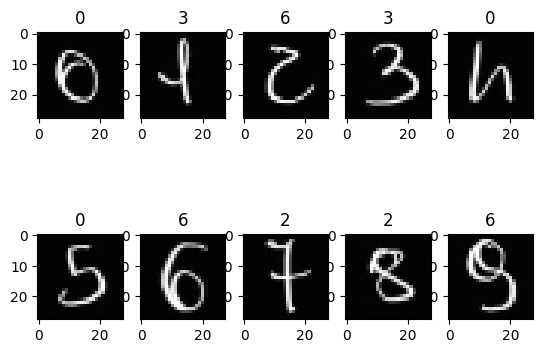

In [53]:
# carico modello salvato
model = keras.models.load_model('4_mnist/models/np.mnist.model.h5')

# applico modello alle mie immagini
for i in range(0, immagini.shape[0]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(immagini[i], cmap = 'gray')
    plt.title(np.argmax(model.predict(immagini[i].reshape(1,784))))
plt.show(block = False)

## Pre processing

Visualizziamo un'immagine del dataset di learning (per modificare il numero dell'immagine, modifica il valore della variabile `npat`)

In [ ]:
# loading data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path = "mnist.npz")

# undestand data dimensions
print("Data dimensions:\n")
print("x_lrn:",x_train.shape)
print("x_tst:",x_test.shape)
print("y_lrn:",y_train.shape)
print("y_tst:",y_test.shape)

In [ ]:
npat = 7
print("Ecco il pattern n.", npat)
print("Il valore atteso è: ", y_train[npat]);

img = x_train[npat];
plt.imshow(img, cmap = 'gray')
plt.show(block = False)

Da adesso in poi useremo una variabile temporanea `img` che conterrà l'immagine `x_train[npat]` in modo tale da non lavorare con l'intero array di immagini.

## Reducing noise

L'idea è quella di applicare un filtro mediano.

Utilizzeremo la libreria `OpenCV` (che importeremo con `import cv2`) dopo averla installata da terminale `pip install opencv-python`

In [ ]:
# add noise in pixel 3,3
img[3,3] = 100
x_train[npat,3,3] = 100

# show img
plt.imshow(img, cmap = 'gray')
plt.show()

In [ ]:
# using csv2 to remove noise
# x_train = cv2.medianBlur(x_train, 1)

# bisognerebbe fare un for ma l'operazioe sembra molto lenta
dn1 = cv2.fastNlMeansDenoising(img, h=60, templateWindowSize=3, searchWindowSize=8)
dn2 = cv2.GaussianBlur(img, (3, 3), 1)
dn3 = cv2.bilateralFilter(img, 9, 70, 70)

denoised = [dn1, dn2, dn2]
titles = ["fastNlMeansDenoising", "GaussianBlur", "bilateralFilter"]

# plotting
plt.title("Noisy image")
plt.imshow(img, cmap = 'gray')
plt.show()

for i in range(len(denoised)):
    plt.subplot(1,4,i+1)
    plt.title(titles[i])
    plt.imshow(denoised[i], cmap = 'gray')
    plt.show

# scelgo fastNlMeansDenoising
img = dn1

In [ ]:
# voglio applicare il filtro di denoising a tutto l'array
# ATTENZIONE: bisogna farlo anche per il test set

# Inizializza un nuovo array vuoto per le immagini filtrate
x_train_filtered = np.zeros_like(x_train)
x_test_filtered = np.zeros_like(x_test)

for i in range(len(x_train)):
    x_train_filtered[i] = cv2.fastNlMeansDenoising(x_train[i], h=60, templateWindowSize=3, searchWindowSize=8)
    
for i in range(len(x_test)):
    x_test_filtered[i] = cv2.fastNlMeansDenoising(x_test[i], h=60, templateWindowSize=3, searchWindowSize=8)

In [ ]:
# plot filtered image
plt.imshow(x_train_filtered[npat], cmap = 'gray')
plt.show()

In [ ]:
plt.imshow(img, cmap = 'gray')
plt.title("Denoised")
plt.show()

In [ ]:
img[3,3]

## Binarizing

Al fine di uniformare lo spessore dei caratteri, sembrerebbe necessario effettuare una binarization ovvero rendere "binari" i valori dei pixel (0 oppure 1).

Esistono varie tecniche ([vedi qui](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)) ma noi proveremo ad usare `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`

```python
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
```

se non funzinoa, possiamo provare il metodo di Otzu:
```python
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
```

In [ ]:
# adaptive thresh gaussian
atg = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,6)

# otsu
ret,img = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plotting results
plt.subplot(1,2,1)
plt.title("Adaptive thresh gaussian")
plt.imshow(atg, cmap = 'gray')
plt.subplot(1,2,2)
plt.title("Otsu's Binarization")
plt.imshow(img, cmap = 'gray')
plt.show()

In [ ]:
# inizializzo array vuoto
x_train_bin = np.zeros_like(x_train)
x_test_bin = np.zeros_like(x_test)

for i in range(len(x_train)):
    ret,img = cv2.threshold(x_train_erode[i],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    x_train_bin[i] = img

for i in range(len(x_test)):
    ret,img = cv2.threshold(x_test_erode[i],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    x_test_bin[i] = img

In [ ]:
# plot filtered image
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(x_train[npat], cmap = 'gray')
plt.subplot(1,2,2)
plt.title("Binarized, denoised, eroded")
plt.imshow(x_train_bin[npat], cmap = 'gray')
plt.show()

Continueremo utilizzando il metodo di Otsu

## Fix discontinuity

OpenCV's Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

`closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)`

dove 

`kernel = np.ones((5,5),np.uint8)`

è la dimensione della finestra di azione del filtro.

[Click here](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html) for more info

Si tratta essenzialmente di un `dilate` seguito da `erode` per "coprire i buchi"

In [ ]:
# pixel lato finestra
w = 2

# creo finestra
kernel = np.ones((w,w),np.uint8)

# rimuovo buchi
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.imshow(img, cmap = 'gray')
plt.show()

## Uniformare thickness

- domanda senza risposta stackoverflow https://stackoverflow.com/questions/56601130/how-to-reduce-the-thickness-of-the-contours

- qui una risposta https://stackoverflow.com/questions/51133962/how-can-i-scale-a-thickness-of-a-character-in-image-using-python-opencv

Lo strumento vincente sembra erosion di OpenCV ([leggi qui](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html#erosion))

La sintassi è:

```python
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
```

In [ ]:
w = 2

# creo finestra
kernel = np.ones((w,w),np.uint8)

# riduco spessore
erosion = cv2.erode(img,kernel,iterations = 1)

plt.imshow(erosion, cmap = 'gray')
plt.show()

In [ ]:
# applico erode all'array x_train_filtered

# test = cv2.erode(x_train_filtered, kernel, iterations = 1)

plt.imshow(test[npat], cmap = 'gray')
plt.show()

# non funziona bene

In [ ]:
# Inizializza un nuovo array vuoto per le immagini erode
x_train_erode = np.zeros_like(x_train)
x_test_erode = np.zeros_like(x_test)

# applico filtro erode all'array x_train_filtered
for i in range(len(x_train_filtered)):
    x_train_erode[i] = cv2.erode(x_train_filtered[i], kernel, iterations = 1)

for i in range(len(x_test)):
    x_test_erode[i] = cv2.erode(x_test_filtered[i], kernel, iterations = 1)

In [ ]:
plt.imshow(x_train_erode[npat], cmap = 'gray')
plt.show()

## Erode without binarizing

Ecco quello che si ottiene lanciando `cv2.erode` su un'immagine non precedentemente binarizzata

In [ ]:
w = 2
kernel = np.ones((w,w),np.uint8)

for i in range(w):
    erosion2 = cv2.erode(x_train[npat],kernel,iterations = i+1)
    plt.subplot(1,2,i+1)
    plt.imshow(erosion2, cmap = 'gray')
    titolo = "Erode: kernel={} ; iterations={}".format(w, i+1)
    plt.title(titolo)
plt.show()

### Domanda

Conviene binarizzare?

## focus to content resizing

https://stackoverflow.com/questions/74089678/remove-whitespace-of-a-image-python-opencv

In [ ]:
# flattening
# si può fare anche con neural networks
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

print("New dimensions\n")
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)

In [ ]:
# provo a far girare il modello con il train preprocessato e il test anche

# flattening
# si può fare anche con neural networks
x_train = x_train_bin.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test_bin.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

print("New dimensions\n")
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)

In [ ]:
# casting
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

L'idea è quella di dividere ogni immagine per il max per normalizzare

In [ ]:
# normalizzo
# print("Before normalization")

# x_max = np.amax(x_train, axis = 1, keepdims=True)
# print("I valori univoci dell'array dei massimi (train) sono:",np.unique(x_max))
x_train /= 255

# x_max = np.amax(x_test, axis = 1, keepdims=True)
# print("I valori univoci dell'array dei massimi (test) sono:",np.unique(x_max))
x_test /= 255

In [ ]:
# rendo categoriche le variabili di output
num_categories = 10
y_train = keras.utils.to_categorical(y_train,num_categories)
y_test = keras.utils.to_categorical(y_test, num_categories)

In [ ]:
print("New categorical output pattern n.",npat,"=",y_train[npat])

## Modello
Adesso creiamo il modello avente due layer di neuroni con funzione di attivazione relu e l'ultimo (output) softmax

In [ ]:
# creo il modello
model=Sequential()

# aggiungo layer + input
model.add(Dense(units=100,activation='relu',input_shape=(784,)))

# aggiungo uno strato nascosto
model.add(Dense(units=2,activation='relu'))

# output layer
model.add(Dense(units=10,activation='softmax'))
model.summary()

In [ ]:
# addestro il modello
model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 15, verbose = 1, validation_data = (x_test, y_test));

In [ ]:
# List all data in history
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Salvataggio del modello
model.save('4_mnist/models/pp.mnist.model.h5')
plt.show()